In [2]:
import pandas as pd
df = pd.read_csv("super_Store.csv" ,  encoding="ISO-8859-1")


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%m/%d/%Y")


In [4]:
# Check for missing values
print(df.isnull().sum())

df.dropna(inplace=True) # Drop rows with missing values (if necessary)

df.drop_duplicates(inplace=True) # Remove duplicate rows if any

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Step 3: Exploratory Data Analysis (EDA)

In [5]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_quantity = df["Quantity"].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873


In [6]:
top_products = df.groupby("Product Name")["Profit"].sum().nlargest(5)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


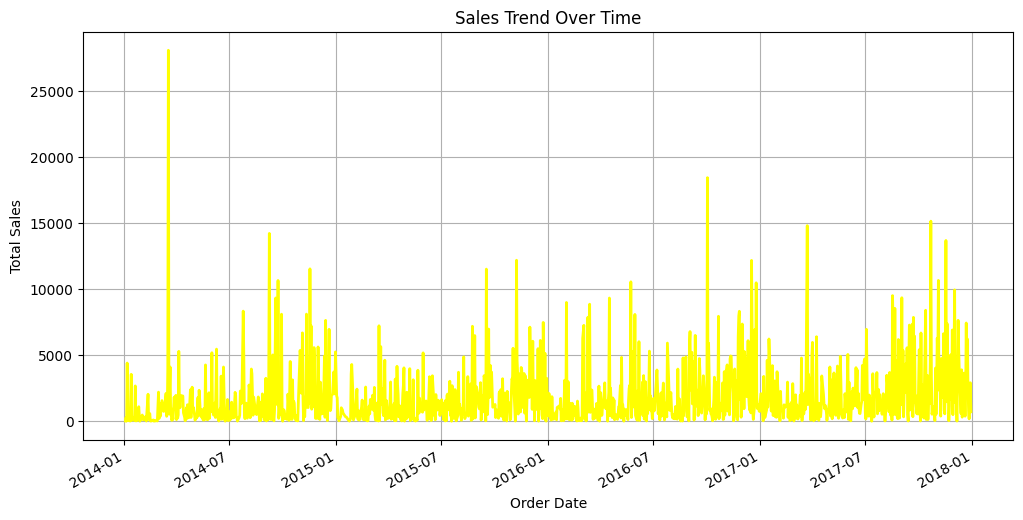

In [7]:
import matplotlib.pyplot as plt

sales_trend = df.groupby("Order Date")["Sales"].sum() # Group by Order Date and sum Sales

plt.figure(figsize=(12, 6))
sales_trend.plot(color="yellow", linewidth=2)
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


Step 4: SQL Queries for Business Insights

In [8]:
import sqlite3

conn = sqlite3.connect(":memory:") # Create SQLite database in memory
df.to_sql("sales_data", conn, index=False, if_exists="replace")


9994

In [9]:
query = """
SELECT State, SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY State
ORDER BY Total_Sales DESC
LIMIT 5;
"""
top_states = pd.read_sql(query, conn)
print(top_states)


          State  Total_Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140


In [10]:
query = """
SELECT strftime('%Y-%m', "Order Date") AS Month, SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql(query, conn)
print(monthly_sales)


      Month  Total_Sales
0   2014-01   14236.8950
1   2014-02    4519.8920
2   2014-03   55691.0090
3   2014-04   28295.3450
4   2014-05   23648.2870
5   2014-06   34595.1276
6   2014-07   33946.3930
7   2014-08   27909.4685
8   2014-09   81777.3508
9   2014-10   31453.3930
10  2014-11   78628.7167
11  2014-12   69545.6205
12  2015-01   18174.0756
13  2015-02   11951.4110
14  2015-03   38726.2520
15  2015-04   34195.2085
16  2015-05   30131.6865
17  2015-06   24797.2920
18  2015-07   28765.3250
19  2015-08   36898.3322
20  2015-09   64595.9180
21  2015-10   31404.9235
22  2015-11   75972.5635
23  2015-12   74919.5212
24  2016-01   18542.4910
25  2016-02   22978.8150
26  2016-03   51715.8750
27  2016-04   38750.0390
28  2016-05   56987.7280
29  2016-06   40344.5340
30  2016-07   39261.9630
31  2016-08   31115.3743
32  2016-09   73410.0249
33  2016-10   59687.7450
34  2016-11   79411.9658
35  2016-12   96999.0430
36  2017-01   43971.3740
37  2017-02   20301.1334
38  2017-03   58872.3528


In [11]:
df.to_csv("Cleaned_Sales_Data.csv", index=False)
